In [883]:
print()
print()
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask a :Import the relevant packages needed to perform this analysis: \033[0m") 
print()
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
import numpy as np
from rasterio.plot import show
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability



TASK 1:
Task a :Import the relevant packages needed to perform this analysis: 



In [884]:
print()
print()
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask b :Translate the CORINE land classes listed above to code values as stored in the dataset using the table above \033[0m") 
print()
print("Areas with exclusion of a distance of 1000m:")
print()

exclusion_areas = {
    111: "Continuous Urban Fabric",
    112: "Discontinuous Urban Fabric",
    121: "Industrial or Commercial Units",
    122: "Road and Rail Networks",
    123: "Port Areas",
    124: "Airports",
}
labels = [111, 112, 121, 122, 123, 124]

for code in labels:
    print(f"Label {code}: {exclusion_areas[code]}")

print()
print("suitable areas for constructing wind turbines:")
print()
inclusion_areas = {
    211: "Non-Irrigated Arable Land",
    212: "Permanently Irrigated Land",
    213: "Rice Fields",
    231: "Pastures",
    241: "Annual Crops with Permanent Crops",
    242: "Complex Cultivation Patterns",
    243: "Land Primarily Occupied by Agriculture with Significant Areas of Natural Vegetation",
    321: "Natural Grasslands",
    323: "Sclerophyllous Vegetation",
    324: "Transitional Woodland-Shrub",
    333: "Sparsely Vegetated Areas",
}

# Example usage
Labels = [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]

for code in Labels:
    print(f"Class {code}: {inclusion_areas[code]}")



TASK 1:
Task b :Translate the CORINE land classes listed above to code values as stored in the dataset using the table above 

Areas with exclusion of a distance of 1000m:

Label 111: Continuous Urban Fabric
Label 112: Discontinuous Urban Fabric
Label 121: Industrial or Commercial Units
Label 122: Road and Rail Networks
Label 123: Port Areas
Label 124: Airports

suitable areas for constructing wind turbines:

Class 211: Non-Irrigated Arable Land
Class 212: Permanently Irrigated Land
Class 213: Rice Fields
Class 231: Pastures
Class 241: Annual Crops with Permanent Crops
Class 242: Complex Cultivation Patterns
Class 243: Land Primarily Occupied by Agriculture with Significant Areas of Natural Vegetation
Class 321: Natural Grasslands
Class 323: Sclerophyllous Vegetation
Class 324: Transitional Woodland-Shrub
Class 333: Sparsely Vegetated Areas




TASK 1:
Task c :Load the country shapes as GeoDataFrame, reduce it to a single entry for Luxembourg, and reproject it to the coordinate reference system EPSG:3035 



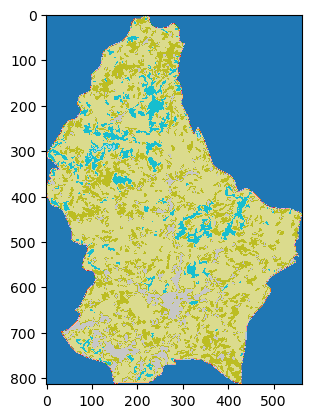

<Axes: >

In [890]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
import numpy as np
from rasterio.plot import show
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability

print()
print()
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask c :Load the country shapes as GeoDataFrame, reduce it to a single entry for Luxembourg, and reproject it to the coordinate reference system EPSG:3035 \033[0m") 
print()

urlcountry = "https://tubcloud.tu-berlin.de/s/7bpHrAkjMT3ADSr/download/country_shapes.geojson"
countries = gpd.read_file(urlcountry).set_index("name")

shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]

url5 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
clc = rasterio.open(url5)
band = clc.read(1)
plt.imshow(band, cmap="tab20")
show(band, cmap="tab20")




TASK 1:
Task d :Plot and calculate (in %) the area excluded by each of the exclusion constraints (1.-6.) individually 

exclusion of natural protection areas:
Total excluded area in percent % =  24.187323996689955


exclusion of second-tier land protection areas:
Total excluded area in percent % =  51.68314836679136

exclusion of a radius of 7 km around airports:
Total eligible area in percent % =  5.8965167615053815

exclusion of a buffer of 400m next to major roads:
Total excluded area in percent % =  7.12367347504788

exclusion of a distance of 1000m around the following CORINE land cover classes: 111, 112, 121, 122, 123, 124:
Total excluded area in percent % =  0.003404296470961299

inclusion only of the following CORINE land cover classes, which are deemed suitable for constructing wind turbines: 211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333:
Total excluded area in percent % =  0.003404296470961299



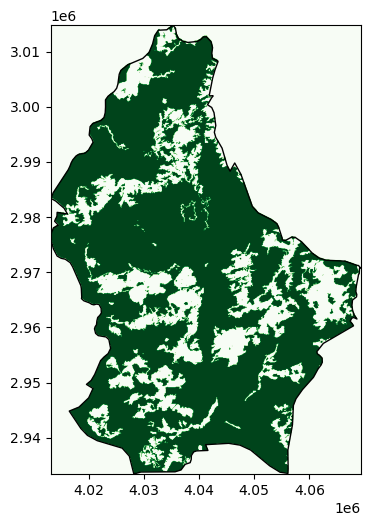

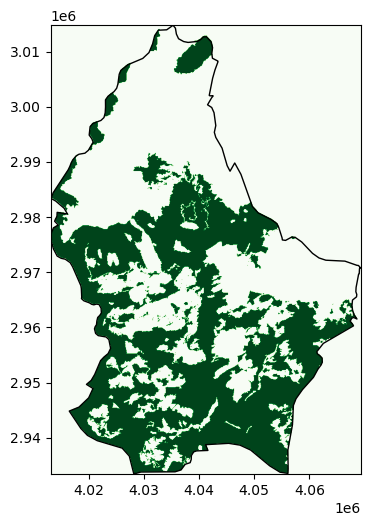

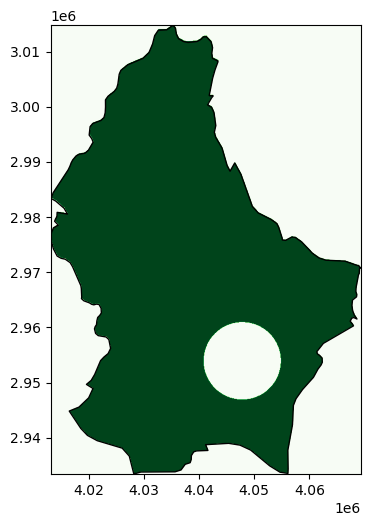

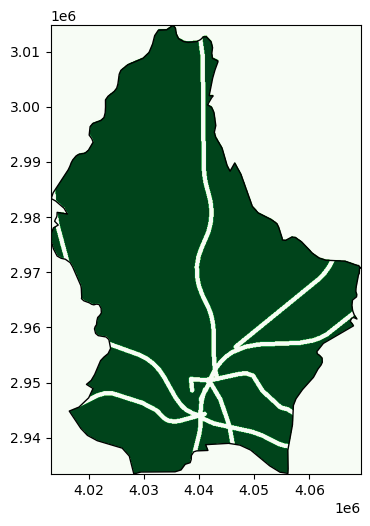

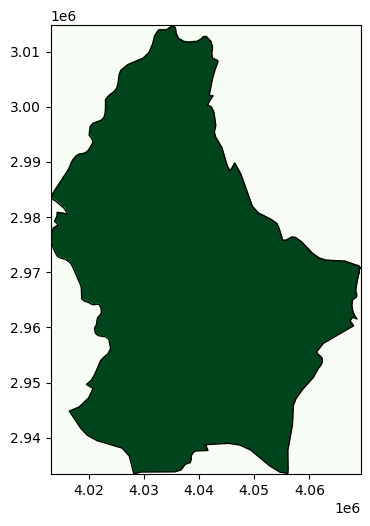

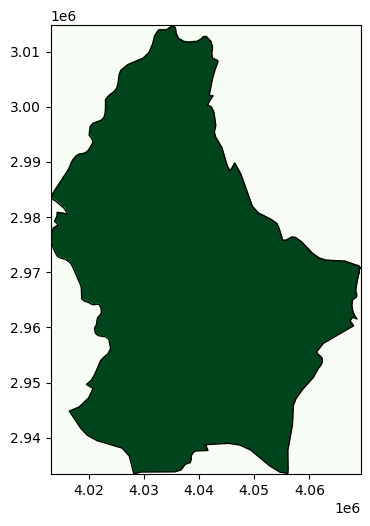

In [898]:
print()
print()
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask d :Plot and calculate (in %) the area excluded by each of the exclusion constraints (1.-6.) individually \033[0m") 
print()

excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
url = "https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
excluder.add_geometry(url)
shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band, transform = shape_availability(shape, excluder)
fig, ax = plt.subplots(figsize=(4, 8))
shape.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Greens", ax=ax)
print("\033[91mexclusion of natural protection areas:\033[0m")
eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
a = 100-(eligible_area / country_area * 100)
print(f'Total excluded area in percent % = ',a)
print()



print()
excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
url2 = "https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg"
excluder.add_geometry(url2)
shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band, transform = shape_availability(shape, excluder)
fig, ax = plt.subplots(figsize=(4, 8))
shape.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Greens", ax=ax)
print("\033[91mexclusion of second-tier land protection areas:\033[0m")
eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
b =100 - (eligible_area / country_area * 100)
print(f'Total excluded area in percent % = ',b)
print()



excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
url3 = "https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
excluder.add_geometry(url3, buffer = 7000)
shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band, transform = shape_availability(shape, excluder)
fig, ax = plt.subplots(figsize=(4, 8))
shape.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Greens", ax=ax)
print("\033[91mexclusion of a radius of 7 km around airports:\033[0m")
eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_cells = float(eligible_cells)
cell_area = float(cell_area)
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
c = 100- (eligible_area / country_area * 100)
print(f'Total eligible area in percent % = ',c)
print()



excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
url4 = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"
excluder.add_geometry(url4, buffer = 400)
shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band, transform = shape_availability(shape, excluder)
fig, ax = plt.subplots(figsize=(4, 8))
shape.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Greens", ax=ax)
print("\033[91mexclusion of a buffer of 400m next to major roads:\033[0m")
eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_cells = float(eligible_cells)
cell_area = float(cell_area)
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
d = 100-(eligible_area / country_area * 100)
print(f'Total excluded area in percent % = ',d)
print()



excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
fn2 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
codes2 = [111, 112, 121,122, 123, 124]
excluder.add_raster(fn2, codes=codes2, buffer=1000, crs=3035)
shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band, transform = shape_availability(shape, excluder)
fig, ax = plt.subplots(figsize=(4, 8))
shape.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Greens", ax=ax)
print("\033[91mexclusion of a distance of 1000m around the following CORINE land cover classes: 111, 112, 121, 122, 123, 124:\033[0m")
eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_cells = float(eligible_cells)
cell_area = float(cell_area)
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
e = 100-(eligible_area / country_area * 100)
print(f'Total excluded area in percent % = ',e)
print()




#excluder = ExclusionContainer(crs=3035)
excluder7 = ExclusionContainer()
fn = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
codes = [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]
excluder7.add_raster(fn, codes=codes, crs=3035)
shape = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band7, transform7 = shape_availability(shape, excluder7)
fig, ax = plt.subplots(figsize=(4, 8))
shape.plot(ax=ax, color="none")
show(band7, transform=transform7, cmap="Greens", ax=ax)
print("\033[91minclusion only of the following CORINE land cover classes, which are deemed suitable for constructing wind turbines: 211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333:\033[0m")
eligible_cells = band7.sum()
eligible_cells = float(eligible_cells)
cell_area = excluder7.res**2
cell_area = float(cell_area)
eligible_area = cell_area * eligible_cells
country_area = shape.geometry.area[0]
f = 100 - (eligible_area / country_area * 100)
print(f'Total excluded area in percent % = ',f)
print()





TASK 1:
Task e :Plot and calculate (in %) the area available for the development of wind parks considering all exclusion zones together 
Total eligible area in percent % =  41.098440586882


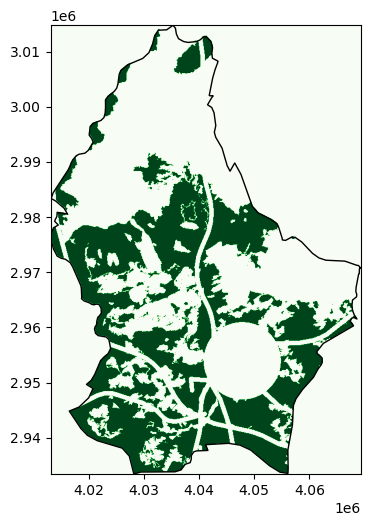

In [902]:
print()
print()
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask e :Plot and calculate (in %) the area available for the development of wind parks considering all exclusion zones together \033[0m") 

'''print("\033[45mTASK 1:\033[0m")
print("\033[94mTask d :What is the total energy in units of TWh that could be produced from wind power in Luxembourg each year if the distance criterion were reduced to 600m? \033[0m") 
print()'''


excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
url = "https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
url2 = "https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg"
url3 = "https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
url4 = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"

excluder = ExclusionContainer()
excluder.add_geometry(url)
excluder.add_geometry(url2)
excluder.add_geometry(url3, buffer = 7000)
excluder.add_geometry(url4, buffer = 400)

#fn = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
#codes = [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]
#excluder.add_raster(fn, codes=codes, buffer=600, crs=3035, invert = True)

fn2 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
codes2 = [111, 112, 121,122, 123, 124]
excluder.add_raster(fn2, codes=codes2, buffer = 1000, crs=3035)


shape_2 = countries.to_crs(excluder.crs).loc[["LU"]].geometry
shape[0]
band, transform = shape_availability(shape_2, excluder)
fig, ax = plt.subplots(figsize=(4, 8))
shape_2.plot(ax=ax, color="none")
show(band, transform=transform, cmap="Greens", ax=ax)

eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_area = cell_area * eligible_cells
country_area = shape_2.geometry.area[0]
el_area = eligible_area / country_area * 100

print(f'Total eligible area in percent % = ',el_area)



TASK 1:
Task f :Perform a sensitivity analysis on the distance criterion to CORINE land classes 

Buffer Distance: 0
Eligible Area: 1245200000
Country Area: 2608468800.011305
Percentage: 47.73681786014092
Cell Area: 10000
Buffer Distance: 200
Eligible Area: 1245200000
Country Area: 2608468800.011305
Percentage: 47.73681786014092
Cell Area: 10000
Buffer Distance: 400
Eligible Area: 1245200000
Country Area: 2608468800.011305
Percentage: 47.73681786014092
Cell Area: 10000
Buffer Distance: 600
Eligible Area: 1245200000
Country Area: 2608468800.011305
Percentage: 47.73681786014092
Cell Area: 10000
Buffer Distance: 800
Eligible Area: 1245200000
Country Area: 2608468800.011305
Percentage: 47.73681786014092
Cell Area: 10000
Buffer Distance: 1000
Eligible Area: 1245200000
Country Area: 2608468800.011305
Percentage: 47.73681786014092
Cell Area: 10000


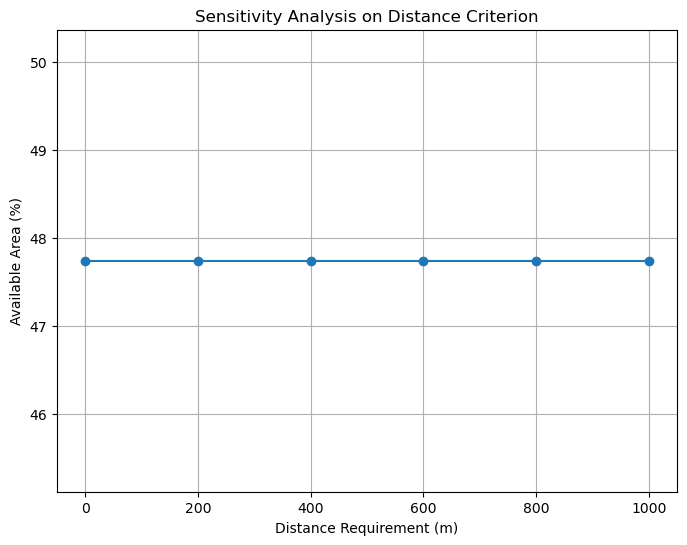

In [900]:
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask f :Perform a sensitivity analysis on the distance criterion to CORINE land classes \033[0m") 
print()

buffer_distances = [0, 200, 400, 600, 800, 1000]
available_areas = []
for buffer_distance in buffer_distances:
    excluder = ExclusionContainer(crs=3035)
    excluder = ExclusionContainer()
    url = "https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
    url2 = "https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg"
    url3 = "https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
    url4 = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"
    excluder.add_geometry(url)
    excluder.add_geometry(url2)
    excluder.add_geometry(url3)
    excluder.add_geometry(url4)
    #fn = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
    #codes = [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]
    fn3 = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
    codes3= [111, 112, 121,122, 123, 124]
    #excluder.add_raster(fn3, codes=codes3, buffer = 1000, crs=3035)
    excluder.add_raster(fn3, codes=codes3, buffer=buffer_distance, crs=3035)
    
    shape_3 = countries.to_crs(excluder.crs).loc[["LU"]].geometry
    #shape[0]
    band2, transform = shape_availability(shape_3, excluder)
    eligible_cells = band2.sum()
    cell_area = excluder.res**2
    #eligible_cells = float(eligible_cells)
    #cell_area = float(cell_area)
    eligible_area = cell_area * eligible_cells
    country_area = shape_3.geometry.area[0]
    bbb = eligible_area / country_area * 100
    print(f"Buffer Distance: {buffer_distance}")
    print(f"Eligible Area: {eligible_area}")
    print(f"Country Area: {country_area}")
    print(f"Percentage: {bbb}")
    print(f"Cell Area: {cell_area}")
    available_areas.append(bbb)
   

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(buffer_distances, available_areas, marker='o')
ax.set_xlabel('Distance Requirement (m)')
ax.set_ylabel('Available Area (%)')
ax.set_title('Sensitivity Analysis on Distance Criterion')
ax.grid(True)
plt.show()

In [908]:
print()
print()
print("\033[45mTASK 1:\033[0m")
print("\033[94mTask g :What is the total energy in units of TWh that could be produced from wind power in Luxembourg each year if the distance criterion were reduced to 600m? \033[0m") 
print()
print("\033[91mfor buffer = 1000 we have:\033[0m")
total_eligible_are_km = eligible_area / 1000000
print(f"total eligible area in km^2 = {total_eligible_are_km:.6f} km^2")
total_assumed_produced_wind_power = total_eligible_are_km * 2.5 * 0.35
print(f"total assumed produced wind power = {total_assumed_produced_wind_power:.6f} MW")

print("\033[91mfor reduced buffer = 600 we have:\033[0m")
excluder = ExclusionContainer(crs=3035)
excluder = ExclusionContainer()
url = "https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
url2 = "https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg"
url3 = "https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
url4 = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"

excluder = ExclusionContainer()
excluder.add_geometry(url)
excluder.add_geometry(url2)
excluder.add_geometry(url3, buffer = 7000)
excluder.add_geometry(url4, buffer = 400)

#fn = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
#codes = [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]
#excluder.add_raster(fn, codes=codes, buffer=600, crs=3035, invert = True)

fng = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
codes_g = [111, 112, 121,122, 123, 124]
excluder.add_raster(fng, codes=codes_g, buffer = 600, crs=3035)

eligible_cells_g = band_g.sum()
cell_area_g = excluder.res**2
eligible_area_g = cell_area_g * eligible_cells_g
country_area_g = shape_g.geometry.area[0]

total_increased_eligible_area_km_g = eligible_area_g / 1000000
print(f"total eligible area in km^2 = {total_increased_eligible_area_km_g:.6f} km^2")
Total_assumed_produced_wind_power_g = total_increased_eligible_area_km_g * 2.5 * 0.35
print(f"Total assumed produced wind power = {Total_assumed_produced_wind_power_g:.6f} MW")
TWH = (Total_assumed_produced_wind_power_g * 365 * 24) / 1000000
print (f"Total_annual_assumed_produced_energy = {TWH:.6f} TWh")
print()
print()





TASK 1:
Task g :What is the total energy in units of TWh that could be produced from wind power in Luxembourg each year if the distance criterion were reduced to 600m? 

for buffer = 1000 we have:
total eligible area in km^2 = 1072.040000 km^2
total assumed produced wind power = 938.035000 MW
for reduced buffer = 600 we have:
total eligible area in km^2 = 1072.040000 km^2
Total assumed produced wind power = 938.035000 MW
Total_annual_assumed_produced_energy = 8.217187 TWh




In [909]:
print()
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask a : Rescale the onshore wind and solar capacity factor time series \033[0m") 
print()
print("\033[91mAt first we have to get the average capacity factor of the  onwind generation. For this purpose we need to divide the average of total load throught the year over average of all capacity factor of the onwind. now we can rescale the capacity factor and get the generated power at each hour.\033[0m")
print()

import pandas as pd

df_2 = pd.read_csv('time-series-lecture-2.csv')
df_2.set_index('Time', inplace=True)
mean_onwind_pu = df_2['onwind [pu]'].mean()
print("Mean of onwind capacity factors = " ,mean_onwind_pu)
mean_load = df_2['load [GW]'].mean() 
print("Mean of Loads during the year =  ",mean_load)
onwind_generation = mean_load / mean_onwind_pu
print("onwind generation = Mean of Loads during the year / Mean of onwind capacity factors =  ",onwind_generation)
print("\033[91mNow we have to multiply this amount of onwind generation to each of capacity factors to get the scaled generated power in each hour.\033[0m")
df_2['onwind [GW]'] = df_2['onwind [pu]'] * wind_generation
print()
a = df_2['onwind [GW]'].sum()
b = df_2['load [GW]'].sum()
if a == b:
    print("     sum of the onwind [GW] column matches the column “load [GW]")
else:
    print("     sum of the 'onwind [GW]' column DOES NOT match the column 'load [GW]'")

mean_solar_pu = df_2['solar [pu]'].mean()

print()
print()
print("Mean of solar capacity factors =",mean_solar_pu)
mean_load = df_2['load [GW]'].mean() 
print("Mean of Loads during the year =  ",mean_load)
solar_generation = mean_load / mean_solar_pu
print("solar generation = Mean of Loads during the year / Mean of solar capacity factors =  ",solar_generation)
df_2['solar [GW]'] = df_2['solar [pu]'] * solar_generation
c = round(df_2['solar [GW]'].sum(), 2)
d = round(df_2['load [GW]'].sum(), 2)  # rounding 0.01
print()
if c == d:
    print("     sum of the solar [GW] column matches the column “load [GW]")
else:
    print("     sum of the 'solar [GW]' column DOES NOT match the column 'load [GW]'")

print()
pd.set_option('display.max_columns', len(df_2.columns))
pd.set_option('display.width', 1000) 
print("\033[91mthe new time series dataframe (df_2) included onwind[GW] and solar[GW] is shown as below:\033[0m")
print(df_2.head(10))
#print(c)
#print(d)




TASK 2:
Task a : Rescale the onshore wind and solar capacity factor time series 

At first we have to get the average capacity factor of the  onwind generation. For this purpose we need to divide the average of total load throught the year over average of all capacity factor of the onwind. now we can rescale the capacity factor and get the generated power at each hour.

Mean of onwind capacity factors =  0.20555640410958906
Mean of Loads during the year =   54.73699166666666
onwind generation = Mean of Loads during the year / Mean of onwind capacity factors =   266.28696830814636
Now we have to multiply this amount of onwind generation to each of capacity factors to get the scaled generated power in each hour.

     sum of the onwind [GW] column matches the column “load [GW]


Mean of solar capacity factors = 0.12262132420091322
Mean of Loads during the year =   54.73699166666666
solar generation = Mean of Loads during the year / Mean of solar capacity factors =   446.39047917131376


In [910]:
print()
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask b : Determine two residual load time series (load - generation) for wind and solar \033[0m") 
print()
print("\033[91mfor the case where all power is supplied by solar = Demand - Variable solar\033[0m")
print()
# residual load = load - renewable solar generation
df_2['solar_residual_load [GW]'] = df_2['load [GW]'] - df_2['solar [GW]']
print(df_2.head(20)[['solar [GW]', 'load [GW]', 'solar_residual_load [GW]']])
print()
print("\033[91mfor the case where all power is supplied by onwind = Demand - Variable onwind\033[0m")
print()
df_2['onwind_residual_load [GW]'] = df_2['load [GW]'] - df_2['onwind [GW]']
print(df_2.head(20)[['onwind [GW]', 'load [GW]', 'onwind_residual_load [GW]']])
print()



TASK 2:
Task b : Determine two residual load time series (load - generation) for wind and solar 

for the case where all power is supplied by solar = Demand - Variable solar

                  solar [GW]  load [GW]  solar_residual_load [GW]
Time                                                             
01/01/2015 00:00    0.000000     41.151                 41.151000
01/01/2015 01:00    0.000000     40.135                 40.135000
01/01/2015 02:00    0.000000     39.106                 39.106000
01/01/2015 03:00    0.000000     38.765                 38.765000
01/01/2015 04:00    0.000000     38.941                 38.941000
01/01/2015 05:00    0.000000     39.045                 39.045000
01/01/2015 06:00    0.000000     40.206                 40.206000
01/01/2015 07:00    0.133917     41.133                 40.999083
01/01/2015 08:00   19.730459     42.963                 23.232541
01/01/2015 09:00   56.379118     45.088                -11.291118
01/01/2015 10:00   78.296890   



TASK 2:
Task c : Plot the two mismatch time series for August in a single figure. Label the graph appropriately. 



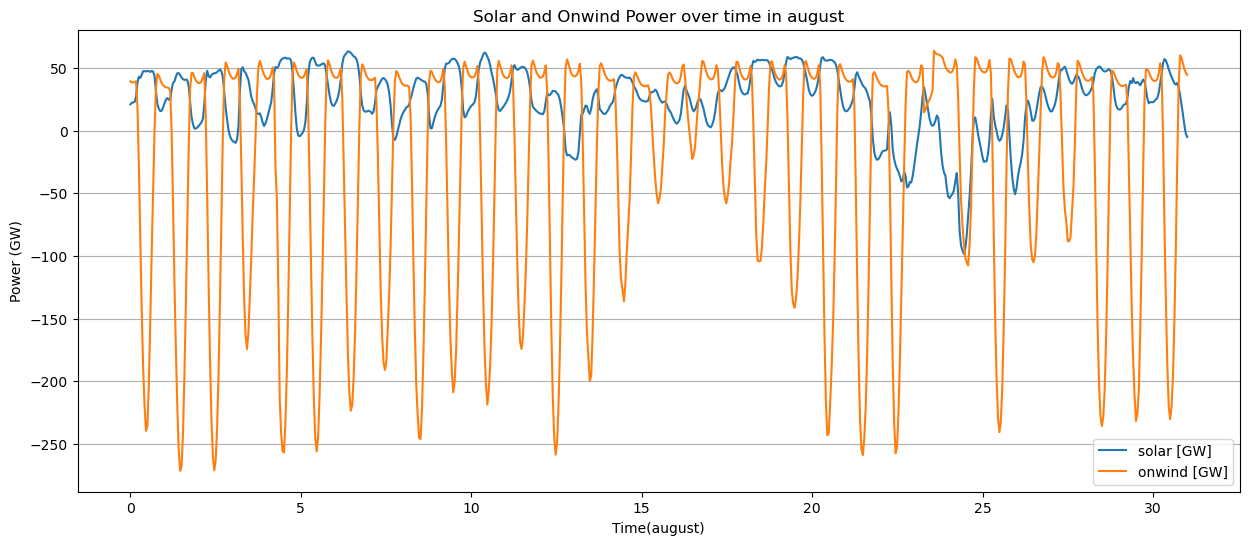

In [911]:
print()
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask c : Plot the two mismatch time series for August in a single figure. Label the graph appropriately. \033[0m") 
print()
#df_2_resetindex = df_2.reset_index()
first_hour = "01/08/2015 00:00"
last_hour = "31/08/2015 23:00"
df_august = df_2.loc[first_hour:last_hour, ['onwind [GW]', 'solar [GW]','onwind_residual_load [GW]','solar_residual_load [GW]']]
days_of_august = np.linspace(0, 31, len(df_august['solar [GW]']))
#df_august.set_index('Time')
#print(df_august.head(5))
plt.figure(figsize=(15, 6))  
plt.plot(days_of_august, df_august['onwind_residual_load [GW]'], label='solar [GW]')
plt.plot(days_of_august, df_august['solar_residual_load [GW]'], label='onwind [GW]')
#plt.plot(df_august.index, df_august['onwind_residual_load [GW]'], label='solar [GW]')
#plt.plot(df_august.index, df_august['solar_residual_load [GW]'], label='onwind [GW]')
plt.xlabel('Time(august)')
#plt.xticks(rotation=45)
plt.ylabel('Power (GW)')
plt.title('Solar and Onwind Power over time in august')
plt.gca().yaxis.grid(True)
plt.legend()
plt.show()





TASK 2:
Task d : For each of the two mismatch time series, calculate the state of charge profiles. 

Compute cumulative sum of excess and shortage and add offset to avoid negative values.This will yield the state of charge (SOC) of the storage.

for solar:

                  solar [GW]  load [GW]  mismatch_cum_solar
Time                                                       
01/01/2015 00:00    0.000000     41.151          -41.151000
01/01/2015 01:00    0.000000     40.135          -81.286000
01/01/2015 02:00    0.000000     39.106         -120.392000
01/01/2015 03:00    0.000000     38.765         -159.157000
01/01/2015 04:00    0.000000     38.941         -198.098000
01/01/2015 05:00    0.000000     39.045         -237.143000
01/01/2015 06:00    0.000000     40.206         -277.349000
01/01/2015 07:00    0.133917     41.133         -318.348083
01/01/2015 08:00   19.730459     42.963         -341.580624
01/01/2015 09:00   56.379118     45.088         -330.289506

smallest_possible_s

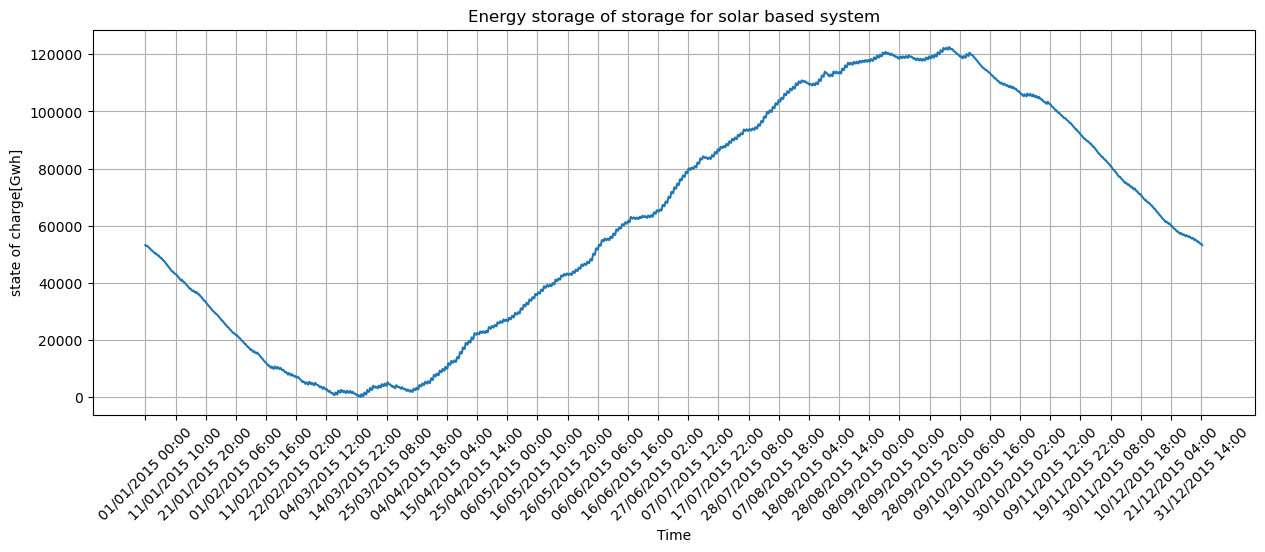


for onwind:

                  onwind [GW]  load [GW]  mismatch_cum_onwind
Time                                                         
01/01/2015 00:00    41.700539     41.151             0.549539
01/01/2015 01:00    44.177008     40.135             4.591547
01/01/2015 02:00    46.493705     39.106            11.979252
01/01/2015 03:00    46.467076     38.765            19.681328
01/01/2015 04:00    48.624000     38.941            29.364328
01/01/2015 05:00    49.769034     39.045            40.088363
01/01/2015 06:00    53.230765     40.206            53.113128
01/01/2015 07:00    56.452837     41.133            68.432965
01/01/2015 08:00    60.740057     42.963            86.210022
01/01/2015 09:00    65.293565     45.088           106.415587

smallest_possible_storage_onwind [GW] = -49614.16264712542



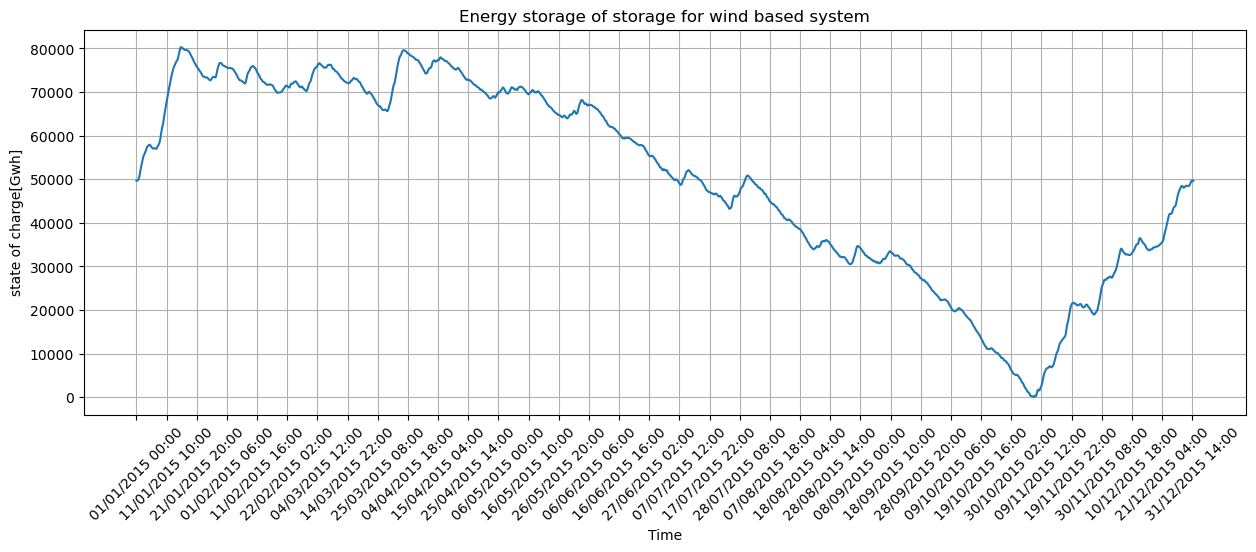

In [927]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
print()
print()

print("\033[45mTASK 2:\033[0m")
print("\033[94mTask d : For each of the two mismatch time series, calculate the state of charge profiles. \033[0m") 
print()
print("\033[91mCompute cumulative sum of excess and shortage and add offset to avoid negative values.This will yield the state of charge (SOC) of the storage.\033[0m")
print()
print("\033[91mfor solar:\033[0m")
df_2['mismatch_cum_solar'] = (df_2['solar [GW]'] - df_2['load [GW]']).cumsum()
#df_2['SOC_solar_cum'] = df_2['SOC_solar_hourly'].cumsum()
pd.set_option('display.max_columns', len(df_2.columns))
pd.set_option('display.width', 1000) 
print()
print(df_2.head(10)[['solar [GW]', 'load [GW]','mismatch_cum_solar']])
smallest_possible_storage_solar = df_2['mismatch_cum_solar'].min()
print()
print("smallest_possible_storage_solar [GW] =",smallest_possible_storage_solar)
print()
df_2['Mismatch_cum_solar'] = df_2['mismatch_cum_solar'] +abs(smallest_possible_storage_solar)
plt.figure(figsize=(15, 5))
plt.plot(df_2.index, df_2['Mismatch_cum_solar'])
plt.title('Energy storage of storage for solar based system')
plt.xlabel('Time')
plt.ylabel('state of charge[Gwh]')
selected_ticks = df_2.index[::250]  
plt.xticks(selected_ticks, rotation=45)
#plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=1))
plt.grid(True)
plt.show()



print()



print("\033[91mfor onwind:\033[0m")
df_2['mismatch_cum_onwind'] = (df_2['onwind [GW]'] - df_2['load [GW]']).cumsum()
#df_2['SOC_solar_cum'] = df_2['SOC_solar_hourly'].cumsum()
pd.set_option('display.max_columns', len(df_2.columns))
pd.set_option('display.width', 1000) 
print()
print(df_2.head(10)[['onwind [GW]', 'load [GW]','mismatch_cum_onwind']])
smallest_possible_storage_onwind = df_2['mismatch_cum_onwind'].min()
print()
print("smallest_possible_storage_onwind [GW] =",smallest_possible_storage_onwind)
print()
df_2['mismatch_cum_onwind'] = df_2['mismatch_cum_onwind'] +abs(smallest_possible_storage_onwind)
plt.figure(figsize=(15, 5))
plt.plot(df_2.index, df_2['mismatch_cum_onwind'])

plt.title('Energy storage of storage for wind based system')
plt.xlabel('Time')
plt.ylabel('state of charge[Gwh]')

selected_ticks = df_2.index[::250]  
plt.xticks(selected_ticks, rotation=45)

plt.grid(True)
plt.show()



In [920]:
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask e : What are the required energy [GWh], charge [GW], discharge [GW] capacities for a purely wind-based and a purely solar-based system \033[0m") 
print()
print("\033[91mCompute cumulative sum of excess and shortage and add offset to avoid negative values.This will yield the state of charge (SOC) of the storage.\033[0m")
print()
print("\033[91mfor solar: the amount of required energy capacity[GWh] and discharge capacity[GW] of the storage in a purely solar-based system can be obtained by the maximum(absolut) of our cumulative mismatch, because we have to met the demand in time of deficit by solar and storage. Actualy the maximum amount of deficit is equal to maximum difference between solar generation and load, therefore this amount have to be met by discharge capacity of our storage.  \033[0m")
print()
Smallest_possible_storage_solar = df_2['mismatch_cum_solar'].min()
print("the minimum discharge capacity of our storage in a purely solar-based system [GW] = ",Smallest_possible_storage_solar)
print()
print("\033[91mnow we we can obtain the amount of energy and charging capacity of our storage by maximum difference between excess comulative mismatch and load: \033[0m")
Smallest_Possible_storage_solar = df_2['mismatch_cum_solar'].max()
print()
print("the minimum charge[GW] and energy capacity[GWh] of our storage in a purely solar-based system  =",Smallest_Possible_storage_solar)
print()
print()
print("\033[91mFor onwind we have the same such as solar: \033[0m")

print("the minimum discharge capacity of our storage in a purely onwind-based system [GW] =",smallest_possible_storage_onwind)
Smallest_Possible_storage_onwind = df_2['mismatch_cum_onwind'].max()

print("the minimum charge[GW] and energy capacity[GWh] of our storage in a purely onwind-based system  ="  ,Smallest_Possible_storage_onwind)
print()

#print("the minimum charge[GW] and energy capacity[GWh] of our storage in a purely onwind-based system  =",Smallest_Possible_storage_solar)




TASK 2:
Task e : What are the required energy [GWh], charge [GW], discharge [GW] capacities for a purely wind-based and a purely solar-based system 

Compute cumulative sum of excess and shortage and add offset to avoid negative values.This will yield the state of charge (SOC) of the storage.

for solar: the amount of required energy capacity[GWh] and discharge capacity[GW] of the storage in a purely solar-based system can be obtained by the maximum(absolut) of our cumulative mismatch, because we have to met the demand in time of deficit by solar and storage. Actualy the maximum amount of deficit is equal to maximum difference between solar generation and load, therefore this amount have to be met by discharge capacity of our storage.  

the minimum discharge capacity of our storage in a purely solar-based system [GW] =  -53215.05775449494

now we we can obtain the amount of energy and charging capacity of our storage by maximum difference between excess comulative mismatch and load: 


In [923]:
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask f :  Write a  Python function that computes the residual load as a function of the solar generation share 𝛼 with a corresponding wind generation share of 1 − 𝛼. \033[0m") 
print()
print("\033[91mthe first 20 values of the df_2['residual_mix'] as shown below:(the amount of solar share is set 0.4 in the function residual_share) \033[0m")

def residual_share(solar_share):
    wind_share = 1 - solar_share
    df_2['residual_mix'] = df_2['load [GW]'] - (solar_share * df_2['solar [GW]'] + wind_share * df_2['onwind [GW]'])
    return(df_2['residual_mix'])

solar_share = 0.4
df_2['residual_mix'] = residual_share(solar_share)
print(df_2['residual_mix'].head(20))
print()



TASK 2:
Task f :  Write a  Python function that computes the residual load as a function of the solar generation share 𝛼 with a corresponding wind generation share of 1 − 𝛼. 

the first 20 values of the df_2['residual_mix'] as shown below:(the amount of solar share is set 0.4 in the function residual_share) 
Time
01/01/2015 00:00    16.130676
01/01/2015 01:00    13.628795
01/01/2015 02:00    11.209777
01/01/2015 03:00    10.884754
01/01/2015 04:00     9.766600
01/01/2015 05:00     9.183579
01/01/2015 06:00     8.267541
01/01/2015 07:00     7.207731
01/01/2015 08:00    -1.373218
01/01/2015 09:00   -16.639786
01/01/2015 10:00   -20.605996
01/01/2015 11:00   -24.847686
01/01/2015 12:00   -27.958242
01/01/2015 13:00   -24.884079
01/01/2015 14:00   -16.263514
01/01/2015 15:00    -9.365533
01/01/2015 16:00    -7.750791
01/01/2015 17:00   -11.019756
01/01/2015 18:00   -16.904306
01/01/2015 19:00   -26.249829
Name: residual_mix, dtype: float64



In [494]:
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask g :  Apply this function for steps of 5% between 0% and 100% for 𝛼 . \033[0m") 
print()
print("\033[91mThe name of the first column below in dataframe df_residual_alpha is 'residual_mix' which can be change by user. Other columns are the share of solar : \033[0m")
print()
df_residual_alpha = pd.DataFrame(df_2['residual_mix'])
#print(df_residual_alpha.head(10))

for values in range(0,101,5):
    solar_share = values / 100
    df_residual_alpha[f'residual_mix_alpha = {solar_share}'] = residual_share(solar_share)

#pd.set_option('display.max_columns', len(df_residual_alpha.columns))
#pd.set_option('display.width', 1000) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 175) 
print(df_residual_alpha.head(5))
    



TASK 2:
Task g :  Apply this function for steps of 5% between 0% and 100% for 𝛼 . 

The name of the first column below in dataframe df_residual_alpha is 'residual_mix' which can be change by user. Other columns are the share of solar : 

                  residual_mix  residual_mix_alpha = 0.0  residual_mix_alpha = 0.05  residual_mix_alpha = 0.1  residual_mix_alpha = 0.15  residual_mix_alpha = 0.2  \
Time                                                                                                                                                                 
01/01/2015 00:00     16.130676                 -0.549539                   1.535488                  3.620515                   5.705542                  7.790569   
01/01/2015 01:00     13.628795                 -4.042008                  -1.833158                  0.375693                   2.584543                  4.793394   
01/01/2015 02:00     11.209777                 -7.387705                  -5.063019              


TASK 2:
Task h :  Plot the required storage charge and discharge capacities as a function of the solar generation share 𝛼.  

 for required storage discharge capacities we need to abtain  the minimum residual load(not absolut value) of the each coresponding alpha, this minimum of negative value show us the required storage charge capacity  : 
residual_mix_alpha = 0.0    -202.275637
residual_mix_alpha = 0.05   -190.570763
residual_mix_alpha = 0.1    -179.687944
residual_mix_alpha = 0.15   -168.970087
residual_mix_alpha = 0.2    -158.856274
residual_mix_alpha = 0.25   -152.814443
residual_mix_alpha = 0.3    -149.640703
residual_mix_alpha = 0.35   -146.466963
residual_mix_alpha = 0.4    -152.598694
residual_mix_alpha = 0.45   -162.593553
residual_mix_alpha = 0.5    -172.588413
residual_mix_alpha = 0.55   -182.583272
residual_mix_alpha = 0.6    -192.578132
residual_mix_alpha = 0.65   -202.737505
residual_mix_alpha = 0.7    -215.832938
residual_mix_alpha = 0.75   -228.940727
residual_mix_a

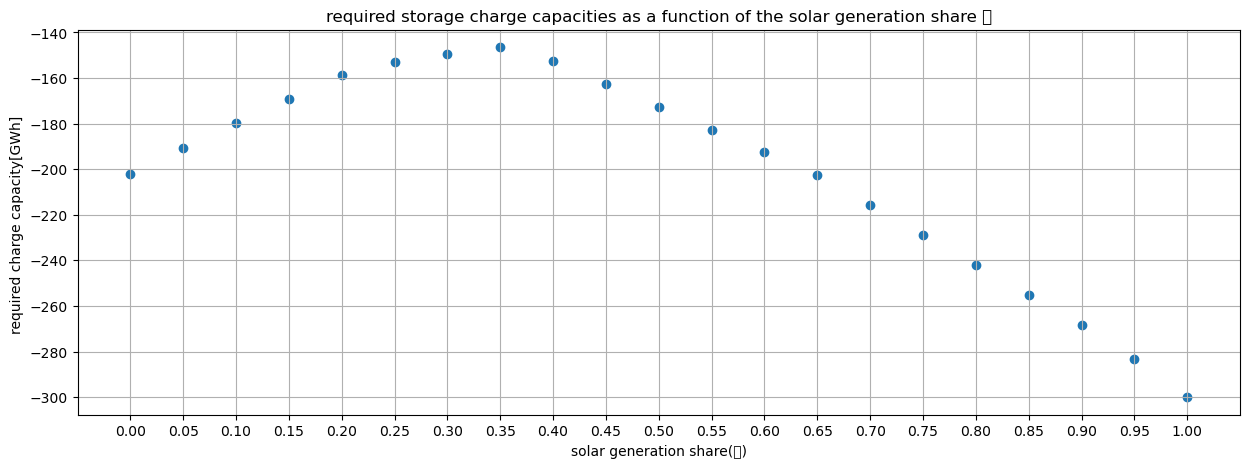



residual_mix_alpha = 0.0     68.401046
residual_mix_alpha = 0.05    67.564407
residual_mix_alpha = 0.1     67.616333
residual_mix_alpha = 0.15    67.668259
residual_mix_alpha = 0.2     67.720185
residual_mix_alpha = 0.25    67.772111
residual_mix_alpha = 0.3     67.824037
residual_mix_alpha = 0.35    67.875963
residual_mix_alpha = 0.4     68.055782
residual_mix_alpha = 0.45    68.276800
residual_mix_alpha = 0.5     68.497818
residual_mix_alpha = 0.55    68.718836
residual_mix_alpha = 0.6     68.939855
residual_mix_alpha = 0.65    69.160873
residual_mix_alpha = 0.7     69.381891
residual_mix_alpha = 0.75    69.602909
residual_mix_alpha = 0.8     69.823927
residual_mix_alpha = 0.85    70.377939
residual_mix_alpha = 0.9     71.126294
residual_mix_alpha = 0.95    72.237462
residual_mix_alpha = 1.0     75.817000
dtype: float64



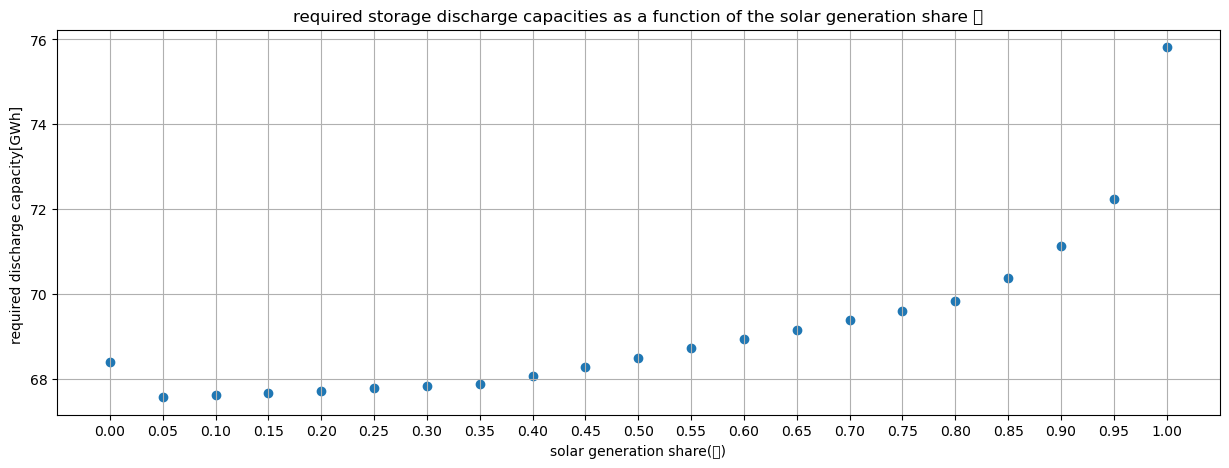

In [928]:
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask h :  Plot the required storage charge and discharge capacities as a function of the solar generation share 𝛼.  \033[0m") 
print()
print("\033[91m for required storage discharge capacities we need to abtain  the minimum residual load(not absolut value) of the each coresponding alpha, this minimum of negative value show us the required storage charge capacity  : \033[0m")
import numpy as np
min_residual_mix_alpha_x = df_residual_alpha.iloc[:, 1:].min(axis=0)
print(min_residual_mix_alpha_x)
print()
alpha = pd.Series(np.arange(0, 1.05, 0.05))
plt.figure(figsize=(15, 5))
plt.xlabel('solar generation share(𝛼)')
plt.ylabel('required charge capacity[GWh] ')
plt.title('required storage charge capacities as a function of the solar generation share ')
plt.scatter(alpha,min_residual_mix_alpha_x) 
plt.xticks(alpha)
plt.grid(True)
plt.show()
print()
print()



max_residual_mix_alpha_x = df_residual_alpha.iloc[:, 1:].max(axis=0)
print(max_residual_mix_alpha_x)
print()
alpha_2 = pd.Series(np.arange(0, 1.05, 0.05))
plt.figure(figsize=(15, 5))
plt.xlabel('solar generation share(𝛼)')
plt.ylabel('required discharge capacity[GWh] ')
plt.title('required storage discharge capacities as a function of the solar generation share ')
plt.scatter(alpha_2,max_residual_mix_alpha_x) 
plt.xticks(alpha_2)
plt.grid(True)
plt.show()




TASK 2:
Task i :  Plot the required energy capacity of a storage as a function of the solar generation share.   

 for required energy capacity of the storage in different solar shares we need to find the maximum of absolut values in the dataframe  df_residual_alpha(this maximum values can be either for charging or discharging). The maximum values of charge or discharge for each of solar shares are shown as below : 

residual_mix_alpha = 0.0     202.275637
residual_mix_alpha = 0.05    190.570763
residual_mix_alpha = 0.1     179.687944
residual_mix_alpha = 0.15    168.970087
residual_mix_alpha = 0.2     158.856274
residual_mix_alpha = 0.25    152.814443
residual_mix_alpha = 0.3     149.640703
residual_mix_alpha = 0.35    146.466963
residual_mix_alpha = 0.4     152.598694
residual_mix_alpha = 0.45    162.593553
residual_mix_alpha = 0.5     172.588413
residual_mix_alpha = 0.55    182.583272
residual_mix_alpha = 0.6     192.578132
residual_mix_alpha = 0.65    202.737505
residual_mix_alpha

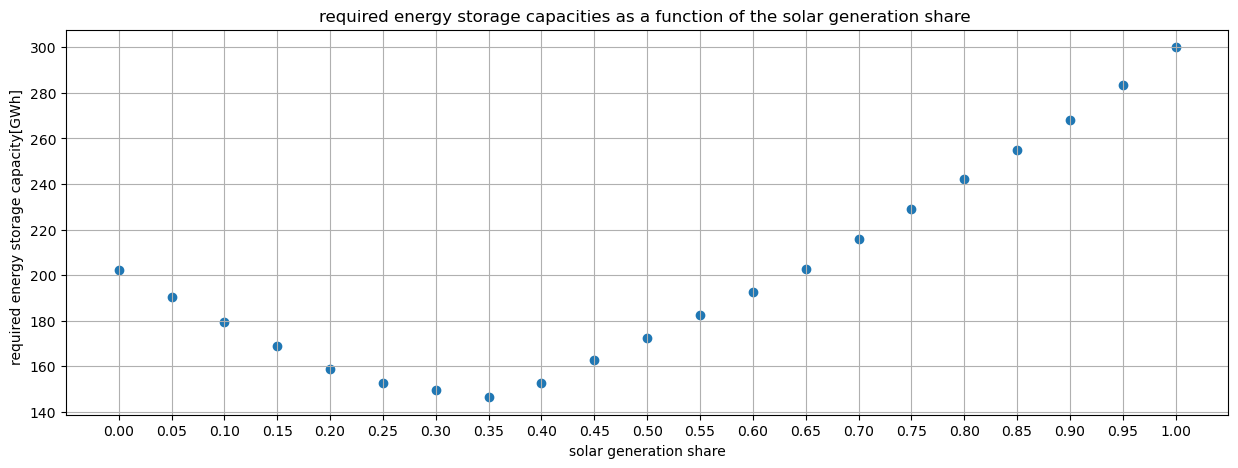

In [929]:
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask i :  Plot the required energy capacity of a storage as a function of the solar generation share.   \033[0m") 
print()
print("\033[91m for required energy capacity of the storage in different solar shares we need to find the maximum of absolut values in the dataframe  df_residual_alpha(this maximum values can be either for charging or discharging). The maximum values of charge or discharge for each of solar shares are shown as below : \033[0m")
print()
#print(min_residual_mix_alpha_x)
#print(max_residual_mix_alpha_x)
energy_capacity_alpha_x =  abs(min_residual_mix_alpha_x).where(abs(min_residual_mix_alpha_x) >= abs(max_residual_mix_alpha_x), abs(max_residual_mix_alpha_x))   
print(energy_capacity_alpha_x)
print()
alpha_2 = pd.Series(np.arange(0, 1.05, 0.05))
plt.figure(figsize=(15, 5))
plt.xlabel('solar generation share')
plt.ylabel('required energy storage capacity[GWh]  ')
plt.title('required energy storage capacities as a function of the solar generation share ')
plt.scatter(alpha_2,energy_capacity_alpha_x) 
plt.xticks(alpha_2)
plt.grid(True)
plt.show()



In [930]:
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask j : Which of the 𝛼 computed results in the lowest energy capacity required for the storage?    \033[0m") 
print()
lowest_j = energy_capacity_alpha_x.min()
correspondind_alpha = energy_capacity_alpha_x.idxmin()
#print(correspondind_alpha)
print(f"the lowest energy capacity required for the storage[GW] is {lowest_j} at the solar share of {correspondind_alpha} ")
print()



TASK 2:
Task j : Which of the 𝛼 computed results in the lowest energy capacity required for the storage?    

the lowest energy capacity required for the storage[GW] is 146.466962932473 at the solar share of residual_mix_alpha = 0.35 




TASK 2:
Task k : Plot the state of charge profile for this 𝛼 and compare it to the cases with 100% wind or solar.



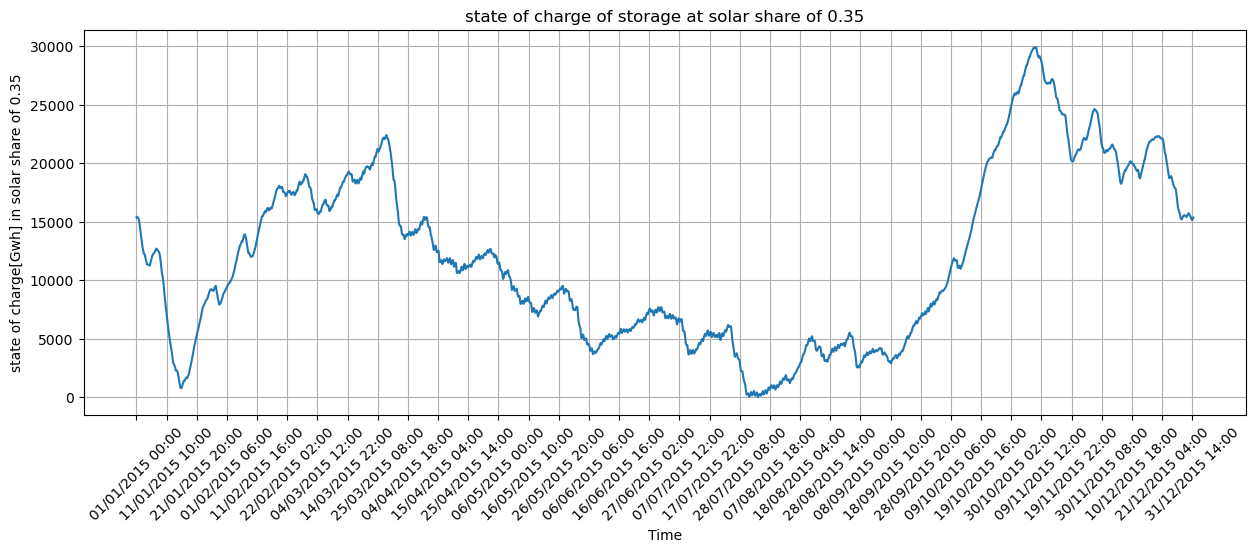


in the plot below are shown the three states of charge in cases that demand is covered by 100% solar share, 100% wind share and 𝛼% solar share. As it is shown for the optimal value of 𝛼 we need to install a storage with lower capacity.  : 



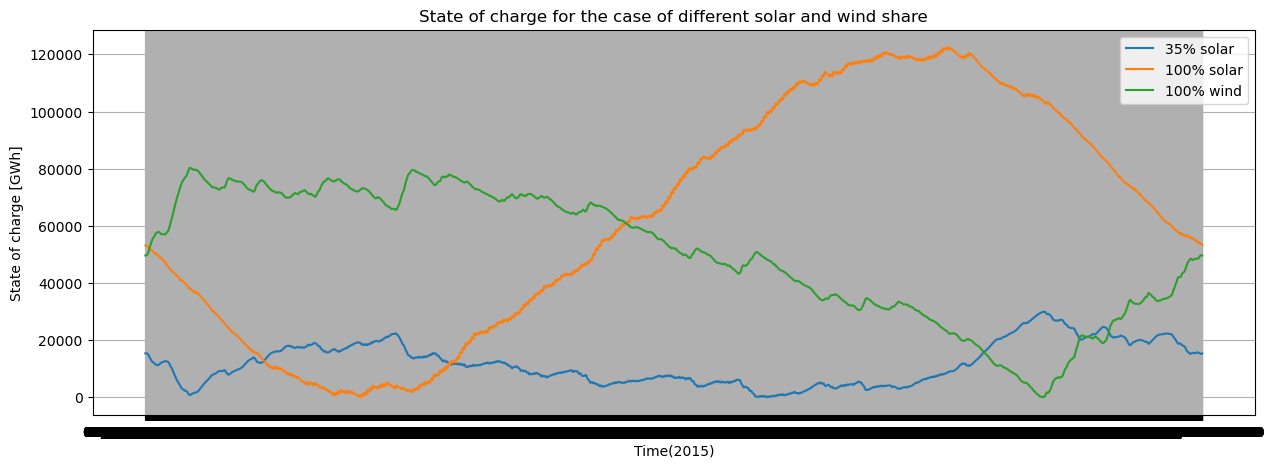

In [946]:
from matplotlib.dates import MonthLocator
print()
print("\033[45mTASK 2:\033[0m")
print("\033[94mTask k : Plot the state of charge profile for this 𝛼 and compare it to the cases with 100% wind or solar.\033[0m") 
print()
plt.figure(figsize=(15, 5))
min_alpha_optimal = residual_share(0.35).cumsum().min()
plt.plot(df_2.index, residual_share(0.35).cumsum()+abs(min_alpha_optimal))
plt.title('state of charge of storage at solar share of 0.35')
plt.xlabel('Time')
plt.ylabel('state of charge[Gwh] in solar share of 0.35')
#plt.xticks(rotation=45)
selected_ticks_2 = df_2.index[::250]  
plt.xticks(selected_ticks_2, rotation=45)
#plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=1))
plt.grid(True)
plt.show()
print()

print("\033[91min the plot below are shown the three states of charge in cases that demand is covered by 100% solar share, 100% wind share and 𝛼% solar share. As it is shown for the optimal value of 𝛼 we can install a storage with lower capacity.  : \033[0m")
print()
#plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_2.index, residual_share(0.35).cumsum()+abs(min_alpha_optimal), label='35% solar')
ax.plot(df_2.index, df_2['Mismatch_cum_solar'].values , label='100% solar')
ax.plot(df_2.index, df_2['mismatch_cum_onwind'].values, label='100% wind')
#selected_ticks_3 = df_2.index[::200]  
#plt.xticks(selected_ticks_3, rotation=45)
ax.legend()
ax.set_xlabel('Time(2015)')
ax.set_ylabel('State of charge [GWh]')
ax.set_title('State of charge for the case of different solar and wind share')
ax.set_facecolor('white')
plt.grid(True)
plt.show()


In [972]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask a : Read the provided dataset as a pandas.Series with parsed dates.\033[0m") 
print()
urltask3 = "https://tubcloud.tu-berlin.de/s/af5G99i35dwNPCz/download/water-flows.csv"
dates = 'Date'
df_3 = pd.read_csv(urltask3, parse_dates=[dates], index_col=dates)
series_3 = df_3.squeeze()
print(series_3.head(10))
type(series_3)



TASK 3:
Task a : Read the provided dataset as a pandas.Series with parsed dates.

Date
1983-01-01    1.445017
1983-01-02    1.808810
1983-01-03    3.476350
1983-01-04    1.963007
1983-01-05    4.854887
1983-01-06    2.929737
1983-01-07    1.924227
1983-01-08    3.202120
1983-01-09    2.335110
1983-01-10    1.842050
Name: Scaled Flow, dtype: float64


pandas.core.series.Series


TASK 3:
Task b : Plot the monthly resampled mean flow rate across the whole time span.  



Text(0, 0.5, 'mean flow rate[m^3/s]')

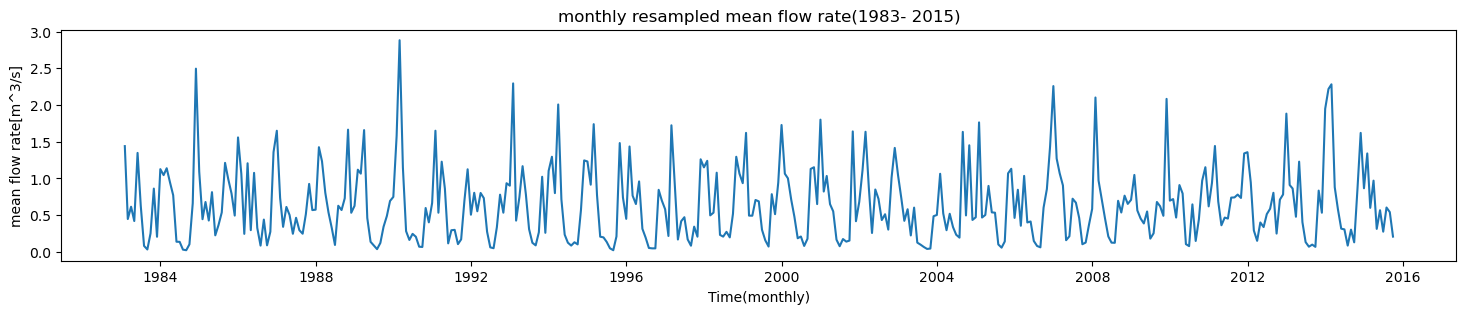

In [973]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask b : Plot the monthly resampled mean flow rate across the whole time span.  \033[0m") 
print()
monthly_resampled_series3 = series_3.resample('M').mean()
plt.figure(figsize=(18, 3))
plt.plot(monthly_resampled_series3.index,monthly_resampled_series3.values, linestyle='-')
plt.title('monthly resampled mean flow rate(1983- 2015)')
plt.xlabel('Time(monthly)')
plt.ylabel('mean flow rate[m^3/s]')


In [974]:
import numpy as np
import math
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask c :  What is the value for the compensation flow?  \033[0m") 
print()
print("\033[91m compensation rate of 95% means that in 95 percent of the time we have the flow rate below a certain value of flow rate. we have to find this certain value as below : \033[0m")
series_3_sorted = series_3.sort_values()
#print(series_3_sorted.head(10))
#print(length_series_3)
length_series_3 = len(series_3)
iloc_comp = math.floor(length_series_3 * 0.05)
#print(iloc)
compensation_rate = series_3_sorted.iloc[iloc_comp]
print()
print(f'compensation_rate [m^3/s] = {compensation_rate}')



TASK 3:
Task c :  What is the value for the compensation flow?  

 compensation rate of 95% means that in 95 percent of the time we have the flow rate below a certain value of flow rate. we have to find this certain value as below : 

compensation_rate [m^3/s] = 0.054569


In [975]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask d :  What is the value for the design flow? \033[0m") 
print()
print("\033[91m for design flow we have to find the value at which the 25 percent of the time we have the flow over that : \033[0m")
print()
iloc_design = math.floor(length_series_3 * 0.75)
design_flow = series_3_sorted.iloc[iloc_design]
#print()
print(f'design flow  = {design_flow:.2f} [m^3/s]')



TASK 3:
Task d :  What is the value for the design flow? 

 for design flow we have to find the value at which the 25 percent of the time we have the flow over that : 

design flow  = 0.79 [m^3/s]


In [976]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask e : Calculate a time series for the available flow for power production  \033[0m") 
print()
print("\033[91m For power production we need to find the values of water flow, which are between campensation rate and design flow : \033[0m")

series_3_available_flow = series_3[(series_3 >= compensation_rate) & (series_3 <= design_flow)]
print(series_3_available_flow.head(20))
#print(f'maximum amount of available flow for power production is {series_3_available_power.max()}')
#print(f'minimum amount of available flow for power production is {series_3_available_power.min()}')



TASK 3:
Task e : Calculate a time series for the available flow for power production  

 For power production we need to find the values of water flow, which are between campensation rate and design flow : 
Date
1983-01-17    0.789265
1983-01-18    0.669140
1983-01-19    0.581792
1983-01-20    0.573852
1983-01-21    0.535072
1983-01-22    0.480687
1983-01-23    0.514204
1983-01-29    0.749193
1983-01-30    0.623527
1983-01-31    0.711890
1983-02-02    0.531286
1983-02-03    0.475978
1983-02-04    0.550584
1983-02-06    0.754456
1983-02-07    0.539596
1983-02-08    0.527870
1983-02-09    0.679481
1983-02-10    0.416423
1983-02-11    0.383183
1983-02-12    0.398788
Name: Scaled Flow, dtype: float64



TASK 3:
Task f : In one figure, plot a duration curve for the total flow and the available flow  



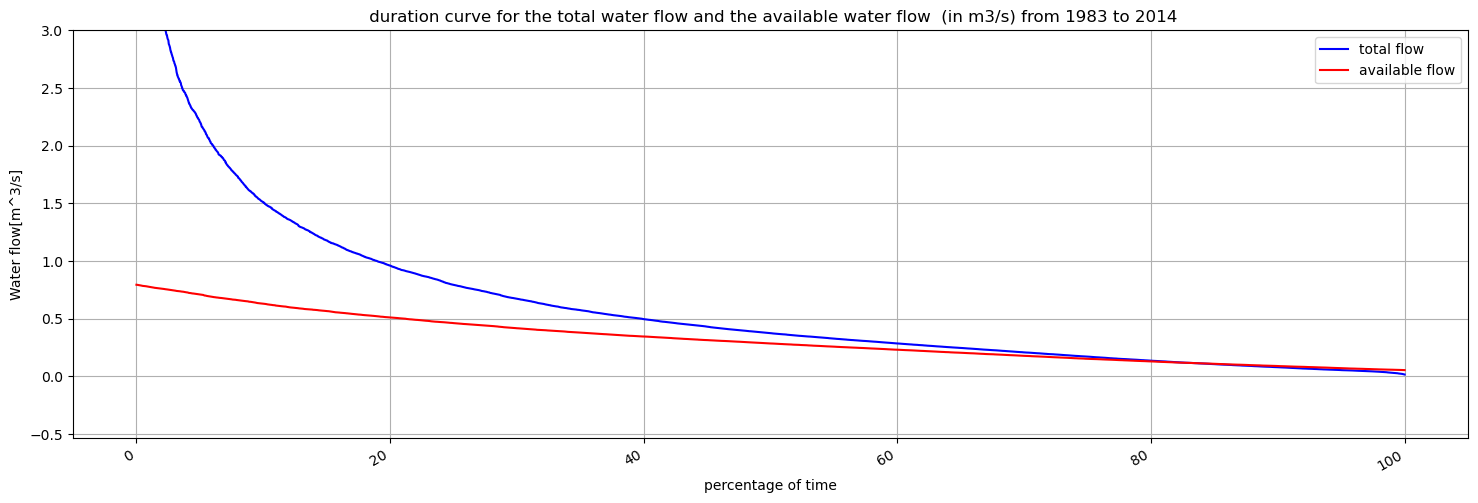

In [977]:

print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask f : In one figure, plot a duration curve for the total flow and the available flow  \033[0m") 
print()
fig, ax = plt.subplots(figsize=(18, 6))
series_3_unsorted = series_3.sort_values(ascending=False)
series_3_available_flow_unsorted = series_3_available_flow.sort_values(ascending=False)
percentage_of_year = np.linspace(0, 100, len(series_3_sorted))
percentage_of_Year = np.linspace(0, 100, len(series_3_available_flow_unsorted))
ax.plot(percentage_of_year,series_3_unsorted.values, linestyle='-', color='b', label = 'total flow')
ax.plot(percentage_of_Year,series_3_available_flow_unsorted.values, linestyle='-',color='r', label = 'available flow' )
ax.set_xlabel('percentage of time')
ax.set_ylabel('Water flow[m^3/s]')
ax.set_title(' duration curve for the total water flow and the available water flow  (in m3/s) from 1983 to 2014')
plt.ylim(top=3)
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(True)
plt.show()
print()


In [978]:

print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask g :  Determine the rated power of the run-of-river scheme using the design flow  \033[0m") 
print()
print("\033[91m The rated power actualy can be obtained using the equation; P = miu * rho * g * H * Q.  in this equation Q is equal to design flow, because we have max flow in this water flow: \033[0m")
miu = 0.9
rho = 1000
g = 9.81
H = 55
Q = design_flow  # [W]
rated_power = (miu * rho * g * H * Q)/1000   #[KW]
print(f"the rated power of the run-of-river scheme using the design flow = {rated_power:.2f} kw")
print()



TASK 3:
Task g :  Determine the rated power of the run-of-river scheme using the design flow  

 The rated power actualy can be obtained using the equation; P = miu * rho * g * H * Q.  in this equation Q is equal to design flow, because we have max flow in this water flow: 
the rated power of the run-of-river scheme using the design flow = 385.77 kw



In [980]:

print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask h :  Compute the time series for the daily electricity production in kWh of the scheme based on the available flows.  \033[0m") 
print()
Daily_electricity_production = (miu * rho * g * H *series_3_available_flow) * 24
daily_electricity_production = Daily_electricity_production / 1000
print("\033[91m The time series for daily_electricity_production in kwh are shown as below: \033[0m")
print(daily_electricity_production.head(20))



TASK 3:
Task h :  Compute the time series for the daily electricity production in kWh of the scheme based on the available flows.  

 The time series for daily_electricity_production in kwh are shown as below: 
Date
1983-01-17    9198.319189
1983-01-18    7798.341034
1983-01-19    6780.370755
1983-01-20    6687.828002
1983-01-21    6235.875023
1983-01-22    5602.064775
1983-01-23    5992.681278
1983-01-29    8731.301111
1983-01-30    7266.758246
1983-01-31    8296.565389
1983-02-02    6191.755804
1983-02-03    5547.184771
1983-02-04    6416.656215
1983-02-06    8792.637587
1983-02-07    6288.602871
1983-02-08    6151.940899
1983-02-09    7918.861829
1983-02-10    4853.114125
1983-02-11    4465.725858
1983-02-12    4647.583128
Name: Scaled Flow, dtype: float64


In [981]:

print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask i :  What is the long-term average capacity factor of the run-of-river power plant?  \033[0m") 
print()
power_flows = (miu * rho * g * H *series_3_available_flow) / 1000
average_capacity_factor = (power_flows / rated_power).mean()
print(f"average capacity factor of the run-of-river power plant = {average_capacity_factor:.2f} pu")
print()




TASK 3:
Task i :  What is the long-term average capacity factor of the run-of-river power plant?  

average capacity factor of the run-of-river power plant = 0.41 pu




TASK 3:
Task j :  Compute and plot the annual energy yields of the plant for the years 1983 to 2014  

Date
1983    9.863164e+05
1984    6.041460e+05
1985    1.050408e+06
1986    8.297243e+05
1987    1.255731e+06
1988    1.225052e+06
1989    7.412879e+05
1990    7.463110e+05
1991    9.209489e+05
1992    1.039212e+06
1993    8.663347e+05
1994    7.064240e+05
1995    8.022208e+05
1996    9.474118e+05
1997    9.132183e+05
1998    1.088984e+06
1999    1.012021e+06
2000    1.002295e+06
2001    9.248615e+05
2002    9.969276e+05
2003    8.226588e+05
2004    1.114814e+06
2005    9.984567e+05
2006    9.093864e+05
2007    9.782167e+05
2008    9.883900e+05
2009    1.046202e+06
2010    9.374107e+05
2011    1.191589e+06
2012    1.193452e+06
2013    9.387978e+05
2014    8.820820e+05
2015    8.895952e+05
Name: Scaled Flow, dtype: float64


Text(0, 0.5, 'annual energy yield [KWh]')

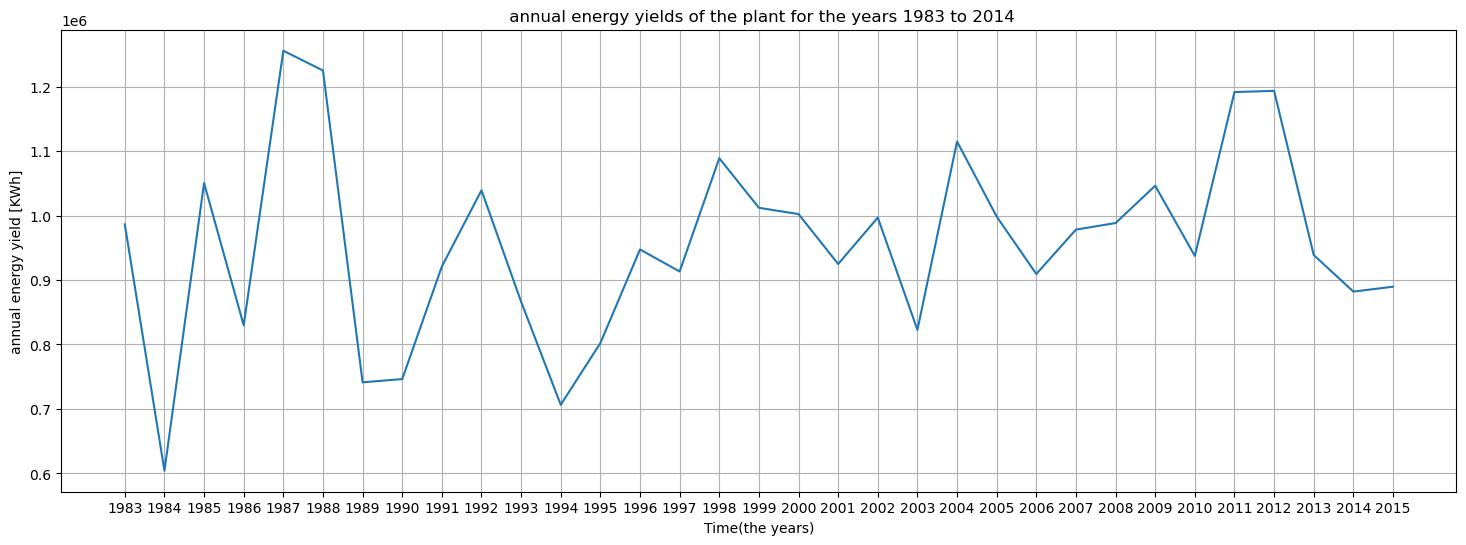

In [982]:

print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask j :  Compute and plot the annual energy yields of the plant for the years 1983 to 2014  \033[0m") 
print()
miu = 0.9
rho = 1000
g = 9.81
H = 55
q = series_3_available_flow * 24
annual_energy_yield = (miu * rho * g * H * q) / 1000
annual_energy_yield_groupby = annual_energy_yield.groupby(series_3_available_flow.index.year).sum()
print(annual_energy_yield_groupby.head(33))
plt.figure(figsize=(18, 6))
plt.plot(annual_energy_yield_groupby.index,annual_energy_yield_groupby.values, linestyle='-')
plt.title(' annual energy yields of the plant for the years 1983 to 2014')
plt.xlabel('Time(the years)')
plt.xticks(annual_energy_yield_groupby.index)
plt.grid(True)
plt.ylabel('annual energy yield [KWh]')



TASK 3:
Task k :   Compute and plot the relative deviation of the annual energy yields from the long-term average annual energy yield.  

deviations series of annual energy yields from the long-term average annual energy yield : 
0      3.161727
1    -36.810595
2      9.865217
3    -13.216693
4     31.340586
5     28.131780
6    -22.466520
7    -21.941136
8     -3.675249
9      8.694245
10    -9.387510
11   -26.113035
12   -16.093364
13    -0.907414
14    -4.483810
15    13.900030
16     5.850214
17     4.832985
18    -3.266016
19     4.271584
20   -13.955698
21    16.601685
22     4.431518
23    -4.884601
24     2.314561
25     3.378611
26     9.425371
27    -1.953456
28    24.631806
29    24.826630
30    -1.808378
31    -7.740450
32    -6.954624
dtype: float64


Text(0, 0.5, 'relative deviation')

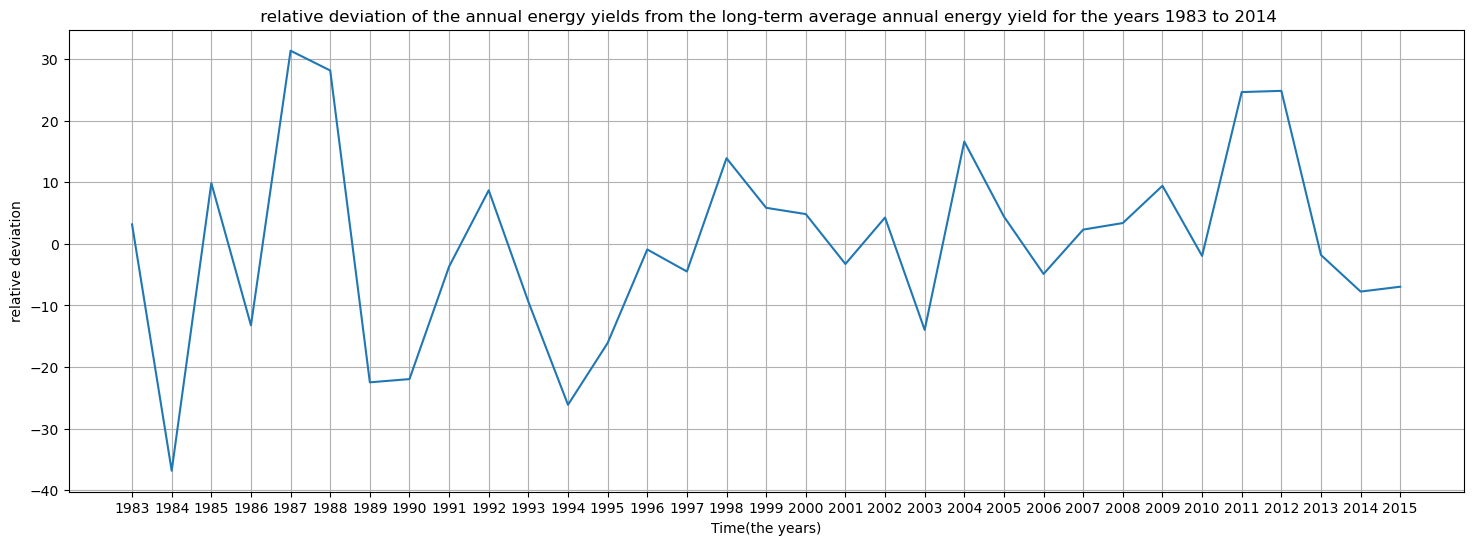

In [984]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask k :   Compute and plot the relative deviation of the annual energy yields from the long-term average annual energy yield.  \033[0m") 
print()
average_energy_yield = annual_energy_yield_groupby.sum()/len(annual_energy_yield_groupby)
deviations =[]
for values in annual_energy_yield_groupby:
    deviation = ((values - average_energy_yield) / average_energy_yield) * 100
    deviations.append(deviation)

deviations_series = pd.Series(deviations)
print("deviations series of annual energy yields from the long-term average annual energy yield : ")
print(deviations_series)
plt.figure(figsize=(18, 6))
plt.plot(annual_energy_yield_groupby.index,deviations, linestyle='-')
plt.title(' relative deviation of the annual energy yields from the long-term average annual energy yield for the years 1983 to 2014')
plt.xlabel('Time(the years)')
plt.xticks(annual_energy_yield_groupby.index)
plt.grid(True)
plt.ylabel('relative deviation')




TASK 3:
Task L :  Plot the relationship between power rating and average annual energy yield based on design flows ranging between the 0% and 100% quantiles of flow in increments of 5%.  

 As can be seen in the diagram below, increasing the design flow also increases the rated power. However, after a certain amount of design flow, the rated power increases more steeply than in the previous slope. This indicates that there is an optimal value for the design flow to balance between output energy and rated power. The slope of the line in the diagram illustrates how sensitive rated power and output energy are to changes in design flow. A steeper slope, or, better put, a small increase in design flow, results in a sudden change in both rated power and output energy.


<function matplotlib.pyplot.show(close=None, block=None)>

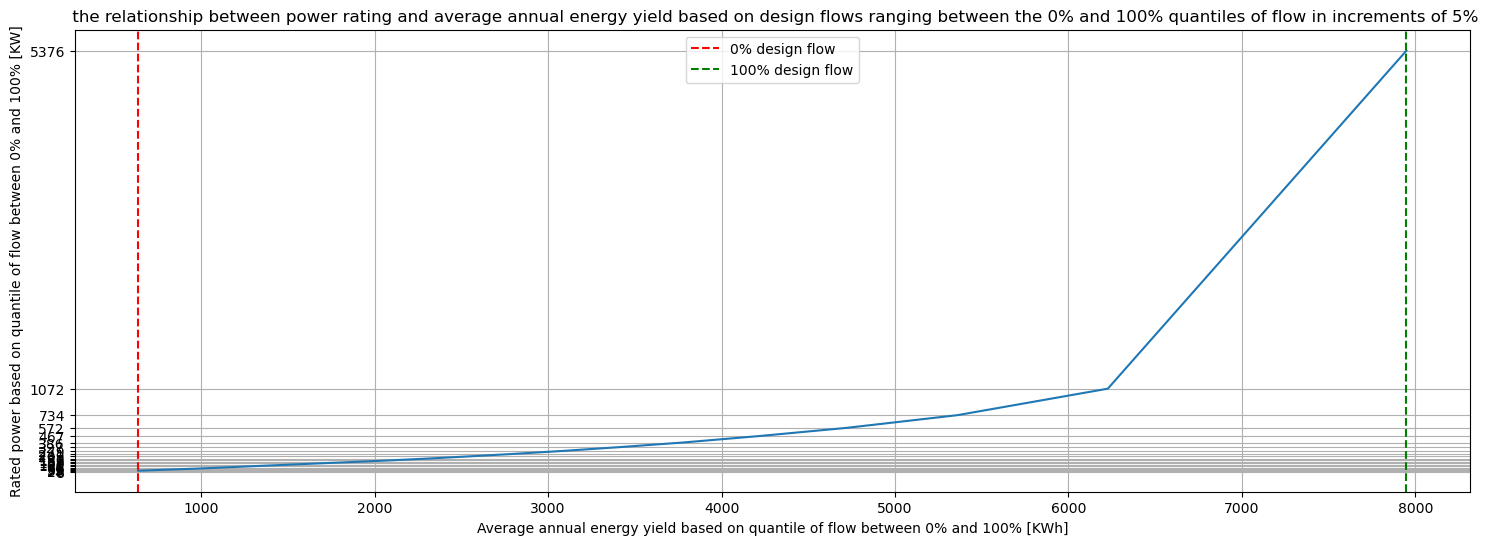

In [985]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask L :  Plot the relationship between power rating and average annual energy yield based on design flows ranging between the 0% and 100% quantiles of flow in increments of 5%.  \033[0m") 
print()
print("\033[91m As can be seen in the diagram below, increasing the design flow also increases the rated power. However, after a certain amount of design flow, the rated power increases more steeply than in the previous slope. This indicates that there is an optimal value for the design flow to balance between output energy and rated power. The slope of the line in the diagram illustrates how sensitive rated power and output energy are to changes in design flow. A steeper slope, or, better put, a small increase in design flow, results in a sudden change in both rated power and output energy.\033[0m")
#www= series_3.quantile(0.05)
#print(www)

quantiles_to_annotate = list(range(0, 101, 5))
Average_annual_energy_yield_groupby_quantile_based =[]
rated_powers=[]
for iii in range(0, 101, 5):
    quantile_flow = iii / 100.0
    quantile_result = series_3.quantile(quantile_flow)
    Series_3_available_flow_quantile_based = series_3[(series_3 >= compensation_rate) & (series_3 <= quantile_result )]
    Series_3_available_flow_quantile_based_groupby = (Series_3_available_flow_quantile_based.groupby(Series_3_available_flow_quantile_based.index.year).mean()).mean()
    Average_annual_energy_yield_groupby = Series_3_available_flow_quantile_based_groupby * 0.024 * miu * rho * g * H 
    Average_annual_energy_yield_groupby_quantile_based.append(Average_annual_energy_yield_groupby)
   
    #reted_power_quantile_based_groupby = Series_3_available_flow_quantile_based.groupby(Series_3_available_flow_quantile_based.index.year)
    rated_power_quantile_based = (miu * rho * g * H * quantile_result) / 1000
    rated_powers.append(rated_power_quantile_based)
    
    #series_3_available_flow_quantile_based = Series_3_available_flow_quantile_based.groupby(Series_3_available_flow_quantile_based.index.year)
    #series_3_available_flow_quantile_based = 0.024 * Series_3_available_flow_quantile_based.mean()
    #annual_energy_quantile.append(series_3_available_flow_quantile_based)
    #average_annual_energy_yield_quantil_based = (miu * rho * g * H * 0.024 * series_3_available_flow_quantile_based).mean()
    #annual_energy_quantile.append(average_annual_energy_yield_quantil_based)
    
plt.figure(figsize=(18, 6))
plt.plot(Average_annual_energy_yield_groupby_quantile_based,rated_powers, linestyle='-')
plt.title(' the relationship between power rating and average annual energy yield based on design flows ranging between the 0% and 100% quantiles of flow in increments of 5%')
plt.xlabel('Average annual energy yield based on quantile of flow between 0% and 100% [KWh]')
plt.yticks(rated_powers)
plt.axvline(x=Average_annual_energy_yield_groupby_quantile_based[1], color='r', linestyle='--', label='0% design flow')
plt.axvline(x=Average_annual_energy_yield_groupby_quantile_based[-1], color='g', linestyle='--', label='100% design flow')
plt.grid(True)
plt.legend()
plt.ylabel('Rated power based on quantile of flow between 0% and 100% [KW]')    
plt.show
#_= plt.xticks(np.linspace(635 , max(Average_annual_energy_yield_groupby_quantile_based), 19))
#_ = plt.yticks(np.linspace(min(rated_powers), max(rated_powers), 20))
#print(rated_powers)
#print(Average_annual_energy_yield_groupby_quantile_based)
#print(rated_powers)



 


TASK 3:
Task m :  How is the average annual energy yield affected by reserve flow requirements?  

difference between the average annual energy yield with two compensation factor of 5% and 10% (in absulut term): 
Date
1983    223.176727
1984    365.835054
1985      0.000000
1986    543.823731
1987      0.000000
1988    189.459175
1989    309.222294
1990    431.386492
1991    321.499874
1992    226.612493
1993    179.923956
1994    518.049825
1995    169.025082
1996    326.519262
1997    168.258347
1998     62.727959
1999    343.230478
2000    384.002169
2001    503.497903
2002      0.000000
2003    317.951517
2004     21.913666
2005    389.095038
2006    177.751364
2007     43.727549
2008    209.142221
2009      0.000000
2010    213.229662
2011     53.163397
2012     66.773455
2013    468.946402
2014    236.204823
2015      0.000000
Name: Scaled Flow, dtype: float64


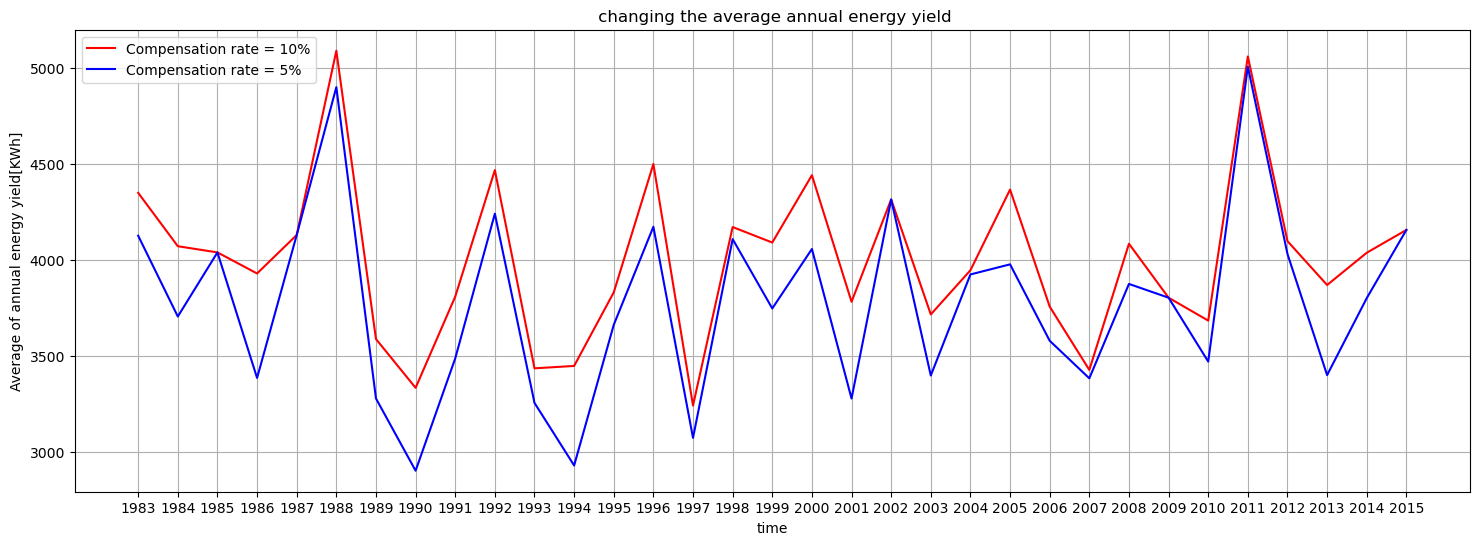


average annual energy yield decrease in relative terms (%): 
Date
1983    -5.407924
1984    -9.870315
1985     0.000000
1986   -16.057962
1987     0.000000
1988    -3.866350
1989    -9.427409
1990   -14.855245
1991    -9.216143
1992    -5.342515
1993    -5.524398
1994   -17.673522
1995    -4.614252
1996    -7.823406
1997    -5.472156
1998    -1.526460
1999    -9.157148
2000    -9.463135
2001   -15.352181
2002     0.000000
2003    -9.353120
2004    -0.558253
2005    -9.781381
2006    -4.964759
2007    -1.291867
2008    -5.395772
2009     0.000000
2010    -6.141599
2011    -1.061850
2012    -1.656116
2013   -13.786697
2014    -6.212520
2015     0.000000
Name: Scaled Flow, dtype: float64


In [986]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask m :  How is the average annual energy yield affected by reserve flow requirements?  \033[0m") 
print()
compensation_10 = series_3.quantile(0.1)
series_3_available_flow_compensation10= series_3[(series_3 >= compensation_10) & (series_3 <= design_flow)]

annual_energy_yield_compensation10 = miu * rho * g * H * series_3_available_flow_compensation10 * 0.024
annual_energy_yield_compensation10_groupby = annual_energy_yield_compensation10.groupby(series_3_available_flow_compensation10.index.year).mean()
annual_energy_yield_groupby_mean = annual_energy_yield.groupby(series_3_available_flow.index.year).mean()
change = annual_energy_yield_compensation10_groupby - annual_energy_yield_groupby_mean
print("difference between the average annual energy yield with two compensation factor of 5% and 10% (in absulut term): ")
print(change)

plt.figure(figsize=(18, 6))
plt.plot(annual_energy_yield_groupby_mean.index,annual_energy_yield_compensation10_groupby.values, linestyle='-', color='r', label = 'Compensation rate = 10%')
plt.plot(annual_energy_yield_groupby_mean.index,annual_energy_yield_groupby_mean.values, linestyle='-',color='b', label = 'Compensation rate = 5%' )
plt.xlabel('time')
plt.ylabel('Average of annual energy yield[KWh]')
plt.title(' changing the average annual energy yield')
#plt.gcf().autofmt_xdate()

plt.legend()
plt.grid(True)
plt.xticks(annual_energy_yield_groupby_mean.index)
plt.show()
print()
#print(annual_energy_yield_compensation10_groupby)
#print(annual_energy_yield_groupby_mean)
#www= series_3.quantile(0.05)
#print(www)
relative_term = (annual_energy_yield_groupby_mean - annual_energy_yield_compensation10_groupby)/annual_energy_yield_groupby_mean
relative_term_percent = relative_term * 100
print("average annual energy yield decrease in relative terms (%): ")
print(relative_term_percent)




In [1]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask m :  How is the average annual energy yield affected by reserve flow requirements?  \033[0m") 
print()


TASK 3:
Task m :  How is the average annual energy yield affected by reserve flow requirements?  



In [2]:
print()
print("\033[45mTASK 3:\033[0m")
print("\033[94mTask m :  How is the average annual energy yield affected by reserve flow requirements?  \033[0m") 
print()


TASK 3:
Task m :  How is the average annual energy yield affected by reserve flow requirements?  

